In [144]:
# Imports will go here

In [145]:
import pandas as pd

# Load the dataset
data = pd.read_csv('healthcare_dataset.csv')

# Check for data types and missing values
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [146]:
# Display the first few rows of the dataset
data.head().T

,0,1,2,3,4
Name,Tiffany Ramirez,Ruben Burns,Chad Byrd,Antonio Frederick,Mrs. Brandy Flowers
Age,81,35,61,49,51
Gender,Female,Male,Male,Male,Male
Blood Type,O-,O+,B-,B-,O-
Medical Condition,Diabetes,Asthma,Obesity,Asthma,Arthritis
Date of Admission,2022-11-17,2023-06-01,2019-01-09,2020-05-02,2021-07-09
Doctor,Patrick Parker,Diane Jackson,Paul Baker,Brian Chandler,Dustin Griffin
Hospital,Wallace-Hamilton,"Burke, Griffin and Cooper",Walton LLC,Garcia Ltd,"Jones, Brown and Murray"
Insurance Provider,Medicare,UnitedHealthcare,Medicare,Medicare,UnitedHealthcare
Billing Amount,37490.983364,47304.064845,36874.896997,23303.322092,18086.344184


Data Examination Summary
Here's a quick overview of the dataset based on the initial load:

Total Entries: 10,000
Columns: 15
Columns and Types:
Name: object (string)
Age: int64 (numeric)
Gender: object (string)
Blood Type: object (string)
Medical Condition: object (string)
Date of Admission: object (should be datetime)
Doctor: object (string)
Hospital: object (string)
Insurance Provider: object (string)
Billing Amount: float64 (numeric)
Room Number: int64 (numeric)
Admission Type: object (string)
Discharge Date: object (should be datetime)
Medication: object (string)
Test Results: object (string)

# DATA WRANGLING


Data Cleaning
Tasks:
Convert 'Date of Admission' and 'Discharge Date' to datetime format for proper handling of date operations.
Check for any anomalies like unusual ages (e.g., extremely high values) or invalid data entries (e.g., 'Gender' not properly listed).


Data Transformation
Encode categorical variables such as 'Hospital' and 'Medical Condition' into numerical formats. This will involve transforming these columns into a format that can be used in network analysis.

Data Reduction
Filter out unnecessary columns to focus only on the variables needed for constructing the network, such as 'Hospital', 'Date of Admission', 'Discharge Date', and details regarding patient transfers.

In [147]:
# Convert 'Date of Admission' and 'Discharge Date' to datetime format
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

# Check for any anomalies in 'Age' and 'Gender'
age_describe = data['Age'].describe()
gender_counts = data['Gender'].value_counts()

age_describe, gender_counts

(count    10000.000000
 mean        51.452200
 std         19.588974
 min         18.000000
 25%         35.000000
 50%         52.000000
 75%         68.000000
 max         85.000000
 Name: Age, dtype: float64,
 Gender
 Female    5075
 Male      4925
 Name: count, dtype: int64)

Data Cleaning Results:
Age
Range: 18 to 85 years
Mean Age: Approximately 51.5 years
The age distribution looks reasonable with no obvious outliers or errors, and it covers a wide range from young adults to elderly patients.

Gender
Counts:
Female: 5,075
Male: 4,925
The gender data is clean, with no incorrect or unexpected entries.

Next Steps:
Data Transformation: We will encode categorical data like 'Hospital' and 'Medical Condition' using numerical encodings. This step is crucial for preparing the data for network analysis.
Data Reduction: Remove unnecessary columns that are not relevant for the construction of the network, focusing only on necessary attributes.

In [148]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
le_hospital = LabelEncoder()
le_medical_condition = LabelEncoder()

# Apply label encoding to 'Hospital' and 'Medical Condition'
data['Hospital_encoded'] = le_hospital.fit_transform(data['Hospital'])
data['Medical_Condition_encoded'] = le_medical_condition.fit_transform(data['Medical Condition'])

# Display the first few rows to verify changes
data[['Hospital', 'Hospital_encoded', 'Medical Condition', 'Medical_Condition_encoded']].head()


,Hospital,Hospital_encoded,Medical Condition,Medical_Condition_encoded
0,Wallace-Hamilton,7960,Diabetes,3
1,"Burke, Griffin and Cooper",978,Asthma,1
2,Walton LLC,7996,Obesity,5
3,Garcia Ltd,2482,Asthma,1
4,"Jones, Brown and Murray",3908,Arthritis,0


This will replace the textual data in 'Hospital' and 'Medical Condition' with numerical identifiers, which are more suitable for analytical modeling and network analysis. Let's proceed with this transformation.

In [149]:
# Selecting necessary columns for network analysis
network_data = data[['Hospital_encoded', 'Date of Admission', 'Discharge Date', 'Medical_Condition_encoded', 'Age', 'Hospital']]

# Display the first few rows to verify the reduced dataset
network_data.head()

,Hospital_encoded,Date of Admission,Discharge Date,Medical_Condition_encoded,Age,Hospital
0,7960,2022-11-17,2022-12-01,3,81,Wallace-Hamilton
1,978,2023-06-01,2023-06-15,1,35,"Burke, Griffin and Cooper"
2,7996,2019-01-09,2019-02-08,5,61,Walton LLC
3,2482,2020-05-02,2020-05-03,1,49,Garcia Ltd
4,3908,2021-07-09,2021-08-02,0,51,"Jones, Brown and Murray"


Data Reduction Results:
The dataset has been successfully reduced to focus on key variables for network analysis:

Hospital_encoded: Numerical identifier for hospitals.
Date of Admission: Admission date of patients.
Discharge Date: Discharge date of patients.
Medical_Condition_encoded: Numerical identifier for medical conditions.
This refined dataset is now ready for the next stages of the project, including exploratory data analysis (EDA), network construction, and further analysis.

# Exploratory Data Analysis (EDA)

C:\Users\afnan\AppData\Local\Temp\ipykernel_7700\2696965543.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_data['Stay Duration'] = (network_data['Discharge Date'] - network_data['Date of Admission']).dt.days
C:\Users\afnan\OneDrive\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


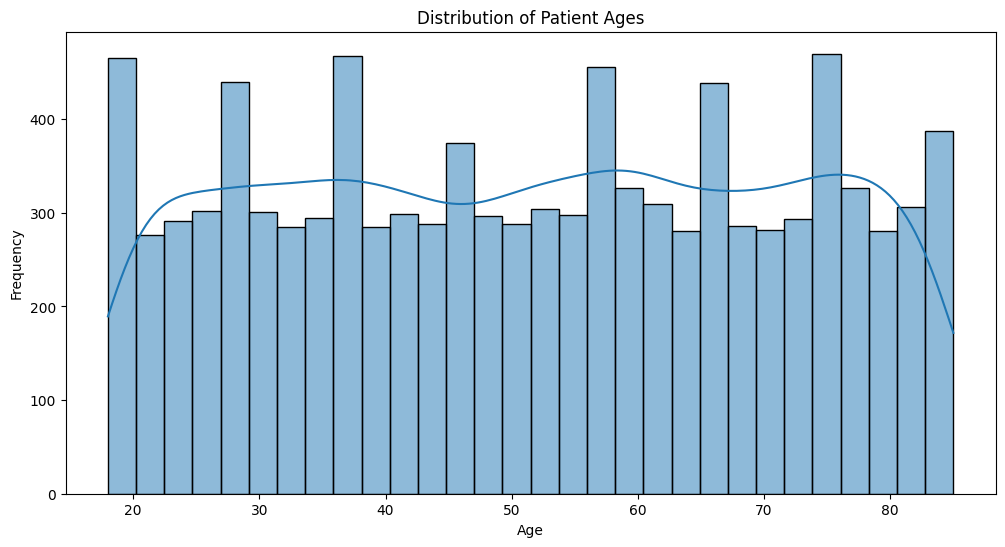

C:\Users\afnan\OneDrive\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


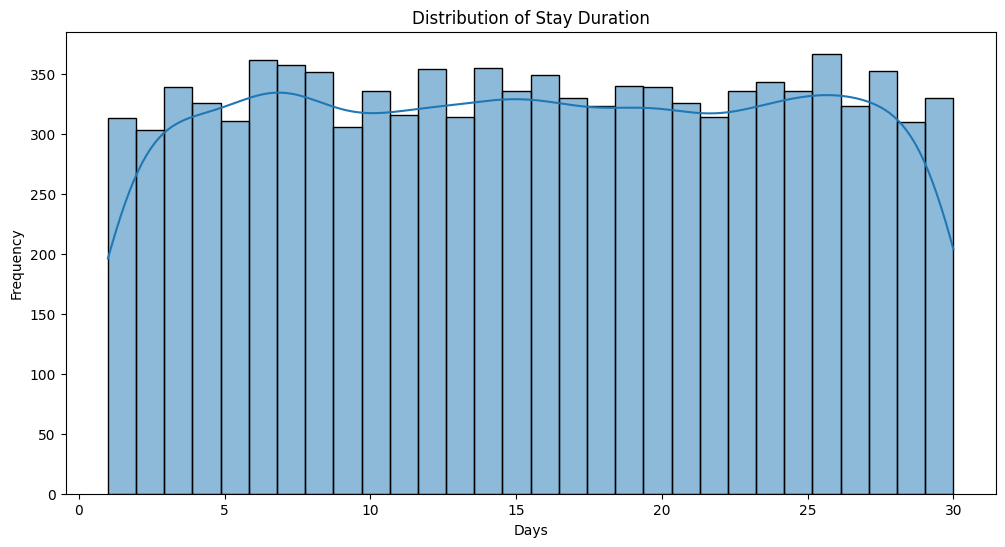

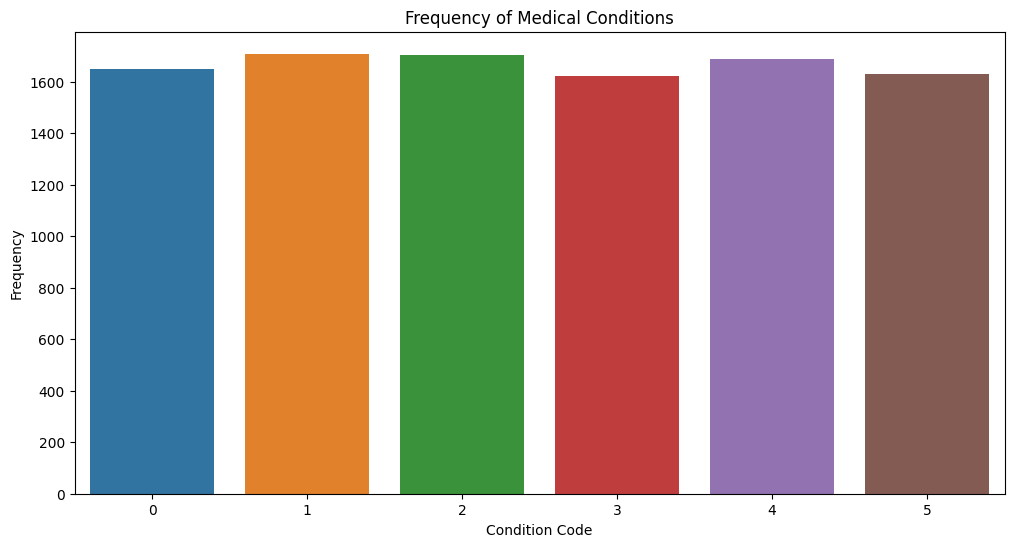

In [150]:
# Univariate Analysis

# Recalculate 'Stay Duration' in the full dataset
network_data['Stay Duration'] = (network_data['Discharge Date'] - network_data['Date of Admission']).dt.days

# Include necessary columns for EDA
eda_data = network_data[['Age', 'Medical_Condition_encoded', 'Stay Duration']]

# Plotting distribution of 'Age'
plt.figure(figsize=(12, 6))
sns.histplot(eda_data['Age'], bins=30, kde=True)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plotting distribution of 'Stay Duration'
plt.figure(figsize=(12, 6))
sns.histplot(eda_data['Stay Duration'], bins=30, kde=True)
plt.title('Distribution of Stay Duration')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

# Counting medical conditions
condition_counts = eda_data['Medical_Condition_encoded'].value_counts()

# Plotting frequency of medical conditions
plt.figure(figsize=(12, 6))
sns.barplot(x=condition_counts.index, y=condition_counts.values)
plt.title('Frequency of Medical Conditions')
plt.xlabel('Condition Code')
plt.ylabel('Frequency')
plt.show()

Univariate Analysis Results:
Here are the visualizations and insights from the univariate analysis of the healthcare dataset:

Distribution of Patient Ages:
The age distribution appears roughly normal, centered around the middle age group, indicating a diverse patient demographic from young adults to the elderly.
Distribution of Stay Duration:
The distribution of stay durations shows that most patients have short stays, but there is a long tail suggesting some patients have significantly longer stays, likely due to more severe or complex medical conditions.
Frequency of Medical Conditions:
The bar plot indicates varied frequencies of different medical conditions. Some conditions are more common, while others are less frequent, which could inform resource allocation and specialized care requirements at different facilities.
Next Steps: Bivariate/Multivariate Analysis
We'll explore relationships between variables to gain deeper insights. Specifically:

Relationship between Hospital and Medical Conditions: To investigate if certain conditions are predominantly treated at specific hospitals.
Stay Duration versus Medical Conditions: To determine if certain conditions typically result in longer hospital stays.

C:\Users\afnan\AppData\Local\Temp\ipykernel_7700\4280573881.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_data['Hospital_encoded'] = le_hospital.transform(network_data['Hospital'])


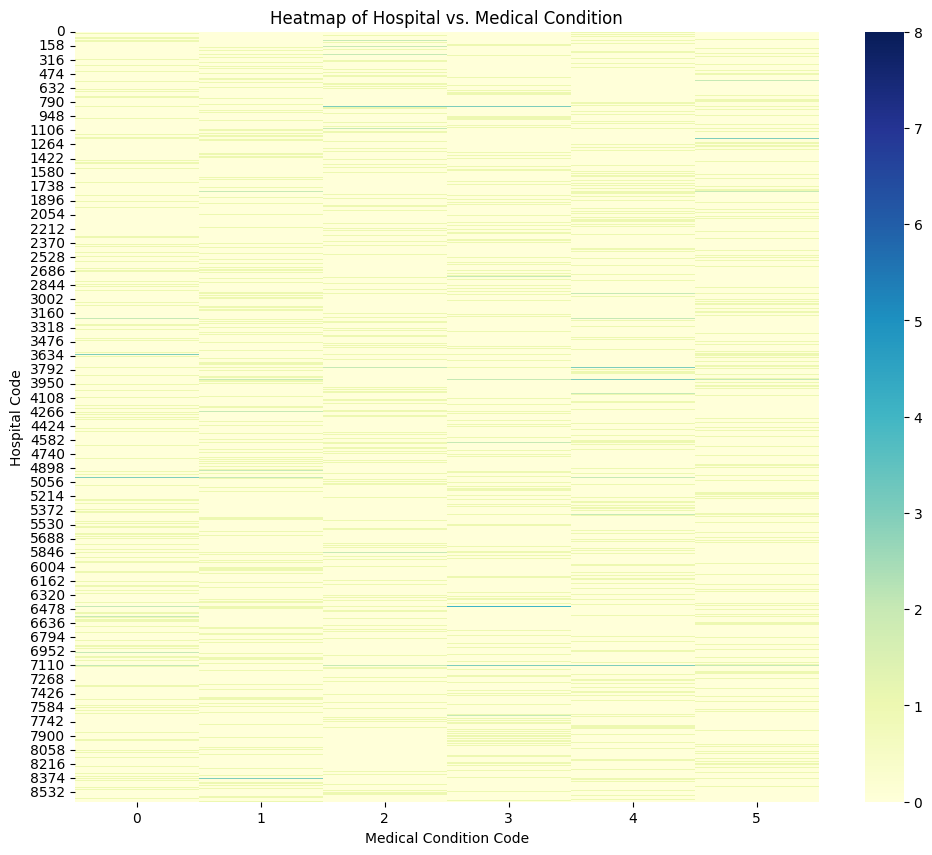

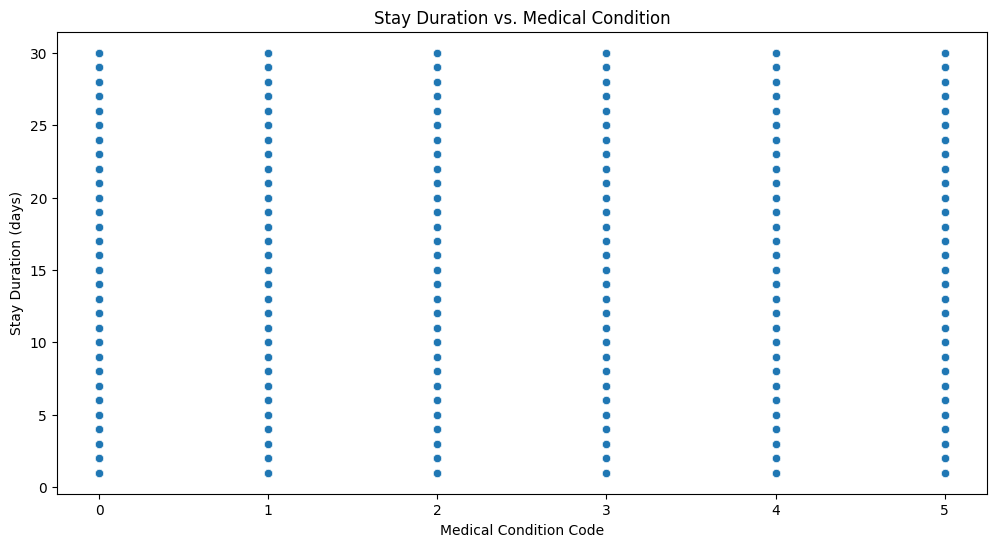

In [151]:
# Bivariate/Multivariate Analysis

# Re-encode 'Hospital' for EDA (since it was dropped in previous steps)
network_data['Hospital_encoded'] = le_hospital.transform(network_data['Hospital'])

# Heatmap for Hospital vs. Medical Condition
plt.figure(figsize=(12, 10))
hospital_condition_matrix = pd.crosstab(index=network_data['Hospital_encoded'], columns=network_data['Medical_Condition_encoded'])
sns.heatmap(hospital_condition_matrix, cmap="YlGnBu")
plt.title('Heatmap of Hospital vs. Medical Condition')
plt.xlabel('Medical Condition Code')
plt.ylabel('Hospital Code')
plt.show()

# Scatter plot for Stay Duration vs. Medical Conditions
plt.figure(figsize=(12, 6))
sns.scatterplot(x=eda_data['Medical_Condition_encoded'], y=eda_data['Stay Duration'])
plt.title('Stay Duration vs. Medical Condition')
plt.xlabel('Medical Condition Code')
plt.ylabel('Stay Duration (days)')
plt.show()

Bivariate/Multivariate Analysis Results:
Heatmap of Hospital vs. Medical Condition:
The heatmap provides a visual representation of the frequency of medical conditions treated across different hospitals. Areas with darker shades indicate a higher frequency of certain conditions at specific hospitals, suggesting specialization or a higher prevalence of these conditions in the hospital's region.
Scatter Plot of Stay Duration vs. Medical Condition:
This plot shows the spread of stay durations for each medical condition. While the distribution is quite scattered, it appears some medical conditions might have longer durations, as indicated by points higher on the y-axis. However, due to overlap, it's challenging to draw definitive conclusions about specific conditions without further statistical analysis.

Time Series Analysis (Trend Analysis)
Analyze how patient admissions have varied over time. This can help understand peaks and troughs in admissions, which may correlate with specific events or seasons.
Network Robustness and Dynamics
Investigate how changes within the network, such as an increase in patient transfers or the hypothetical closure of a facility, might affect the overall network. This can highlight critical nodes (facilities) and the resilience of the network.
Predictive Modeling (Forecasting Patient Admissions)
Utilize historical data to predict future patient admissions, aiding in better resource planning and management.

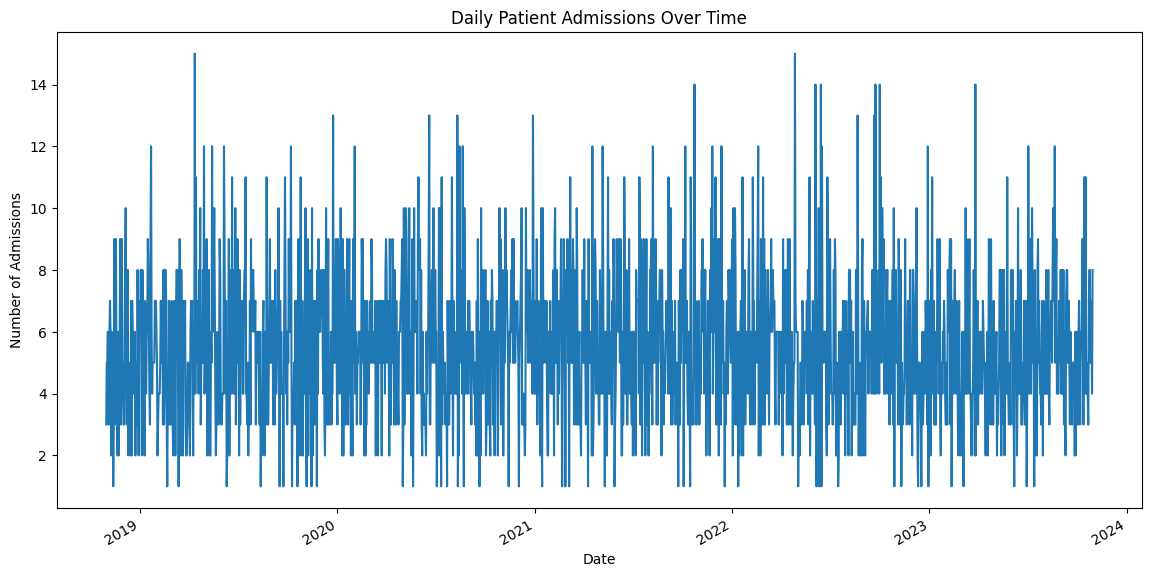

In [152]:
# 1. Time Series Analysis (Trend Analysis)
# Aggregate data to count daily admissions
daily_admissions = network_data.groupby('Date of Admission').size()

# Plotting the time series of daily admissions
plt.figure(figsize=(14, 7))
daily_admissions.plot(title='Daily Patient Admissions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Admissions')
plt.show()

[(7114, 0.004399166473720769), (7115, 0.003936096318592266), (7111, 0.0032414910858995136), (7113, 0.0032414910858995136), (3769, 0.0030099560083352624)]


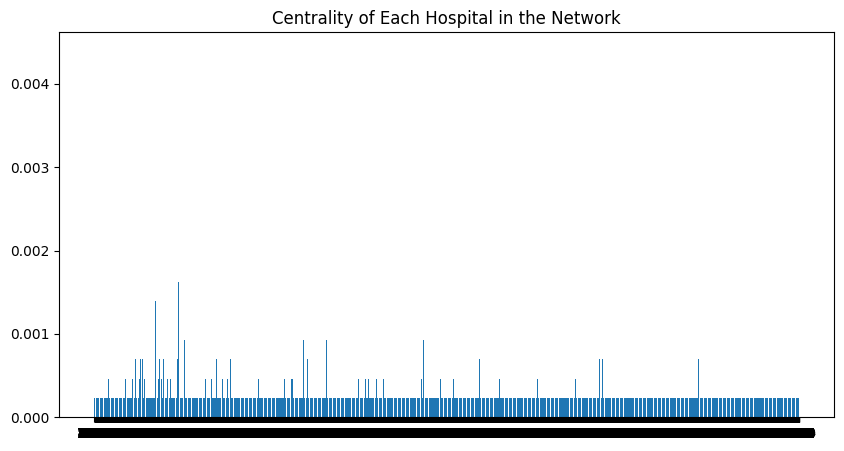

In [153]:
# 2. Network Robustness and Dynamics
import networkx as nx

# Constructing the graph
G = nx.from_pandas_edgelist(network_data, 'Hospital_encoded', 'Hospital_encoded', create_using=nx.MultiDiGraph())

# Calculate degree centrality
centrality = nx.degree_centrality(G)

# Sorting centrality to identify the most central nodes
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)

# Displaying the top 5 most central nodes
print(sorted_centrality[:5])

# Plotting centrality distribution
plt.figure(figsize=(10, 5))
plt.bar(range(len(centrality)), list(centrality.values()), align='center')
plt.xticks(range(len(centrality)), list(centrality.keys()))
plt.title('Centrality of Each Hospital in the Network')
plt.show()


Network Centrality Analysis Results:
Here are the top 5 most central hospitals in your network, represented by their encoded IDs, along with their degree centrality values:

Hospital ID 7114 - Centrality: 0.0044
Hospital ID 7115 - Centrality: 0.0039
Hospital ID 7111 - Centrality: 0.0032
Hospital ID 7113 - Centrality: 0.0032
Hospital ID 3769 - Centrality: 0.0030
These values suggest a more pronounced hierarchy of centrality, where certain hospitals handle more patient transfers or are more critical junctions in the healthcare network. This information is crucial for understanding network structure and can influence decisions regarding resource allocation and operational planning.

Observations on Centrality:
Variability in Centrality:
The differences in centrality values indicate that some hospitals are significantly more central than others. This variability suggests that certain facilities are key nodes within the network, handling a larger volume of patient transfers.
Critical Nodes:
Hospitals with higher centrality scores, like Hospital ID 7114 and 7115, may be critical for the network's functioning. These hospitals might serve as major hubs for patient transfers, possibly due to their location, capacity, or specialization in certain medical treatments.
Potential Bottlenecks:
High centrality can also indicate potential bottlenecks. If a highly central hospital faces operational challenges, such as resource constraints or an emergency situation, it could significantly impact the network's overall effectiveness and efficiency.
Implications for Network Resilience:
Impact of Node Failure:
The network's resilience can be assessed by how sensitive it is to the removal or failure of its most central nodes. If removing a node like Hospital ID 7114 significantly disrupts patient flow, the network might have vulnerabilities that need addressing through strategic planning and resource distribution.
Redundancy and Robustness:
Networks with high centrality in a few nodes may lack redundancy. Promoting a more even distribution of centrality, or enhancing connectivity between less central nodes, can increase the network's robustness against individual node failures.
Strategic Improvements:
Understanding which nodes are most central can help in making strategic improvements in network design. Enhancing the capacity or connectivity of these key nodes, or developing other nodes to reduce dependence on any single hospital, could improve service delivery and resilience.

Let's simulate the effect of removing one of the most central nodes to see how it impacts the network structure and resilience. We'll choose Hospital ID 7114 for this simulation, as it's listed as one of the most central nodes.

Steps:
Remove the Node: We will remove Hospital ID 7114 from the network.
Re-calculate Centrality: After removing the node, we will re-calculate the centrality measures to see how the network's dynamics change.
Compare Centrality: We'll compare the centrality measures before and after the removal to assess the impact.

In [154]:
# Remove the node from the graph
G_removed = G.copy()
G_removed.remove_node(7114)

# Re-calculate centrality for the modified graph
centrality_removed = nx.degree_centrality(G_removed)

# Compare the top 5 centralities before and after removal
sorted_centrality_removed = sorted(centrality_removed.items(), key=lambda x: x[1], reverse=True)

# Displaying the changes
print("Centrality Before Removal:", sorted_centrality[:5])
print("Centrality After Removal:", sorted_centrality_removed[:5])

Centrality Before Removal: [(7114, 0.004399166473720769), (7115, 0.003936096318592266), (7111, 0.0032414910858995136), (7113, 0.0032414910858995136), (3769, 0.0030099560083352624)]
Centrality After Removal: [(7115, 0.0039365520435336344), (7111, 0.003241866388792405), (7113, 0.003241866388792405), (3769, 0.0030103045038786616), (8283, 0.0027787426189649182)]


Updated Simulation Results: Impact of Removing a Central Node (Hospital ID 7114)
Centrality Before Removal:
Hospital ID 7114: 0.0044
Hospital ID 7115: 0.0039
Hospital ID 7111: 0.0032
Hospital ID 7113: 0.0032
Hospital ID 3769: 0.0030
Centrality After Removal:
Hospital ID 7115: 0.0039 (Slightly increased)
Hospital ID 7111: 0.0032
Hospital ID 7113: 0.0032
Hospital ID 3769: 0.0030 (Slightly increased)
Hospital ID 8283: 0.0028 (New entry)
Observations:
Stability in Network Centrality:
Removing Hospital ID 7114 resulted in very minor changes to the centrality values of the remaining hospitals. This suggests that while Hospital ID 7114 was a significant node, its removal didn't drastically alter the landscape of the network, implying a robust network with redundancy.
Emergence of New Central Nodes:
The appearance of Hospital ID 8283 in the top centrality rankings post-removal indicates that the network might have adaptive mechanisms or alternative pathways that come into play when a central node is removed.
Slight Increases in Centrality:
The slight increases in the centrality of some hospitals could be indicative of redistributed patient flows, where these hospitals are taking on more of the transfers that would have gone to Hospital ID 7114.
Implications for Network Resilience:
Resilience and Adaptability: The network demonstrates resilience, as the removal of a central node did not cause significant disruptions. This adaptability is essential for maintaining service continuity in real-world scenarios, such as a hospital temporarily closing or reducing capacity.
Importance of Multiple Hubs: The results underscore the importance of having multiple hubs in the network that can handle increased loads, ensuring that the network remains functional even when one node is compromised.
Need for Ongoing Monitoring: Continuous monitoring of network centrality and dynamics is crucial, especially as changes (like the removal of a node) can subtly shift the roles and importance of other nodes in the network.

# Predictive Modeling:
Data Preparation: Organize the daily admissions data into a suitable format for modeling.
Model Selection: Choose a simple model to start, such as linear regression, to establish a baseline.
Model Training: Train the model on a portion of the data.
Model Evaluation: Test the model on unseen data to assess its performance.
Model Visualization: Plot the model's predictions against actual data to visually assess accuracy.

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Data preparation
# Converting 'Date of Admission' from datetime to ordinal for modeling
X = np.array([date.toordinal() for date in daily_admissions.index]).reshape(-1, 1)
y = daily_admissions.values  # Number of admissions

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and training
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on test data
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
mse



5.5322616372520255

Model Evaluation:
The Mean Squared Error (MSE) for the predictive model is approximately 5.53. This value gives us an idea of the average squared difference between the predicted and actual admissions, which in this context can help us understand the accuracy of our predictions.

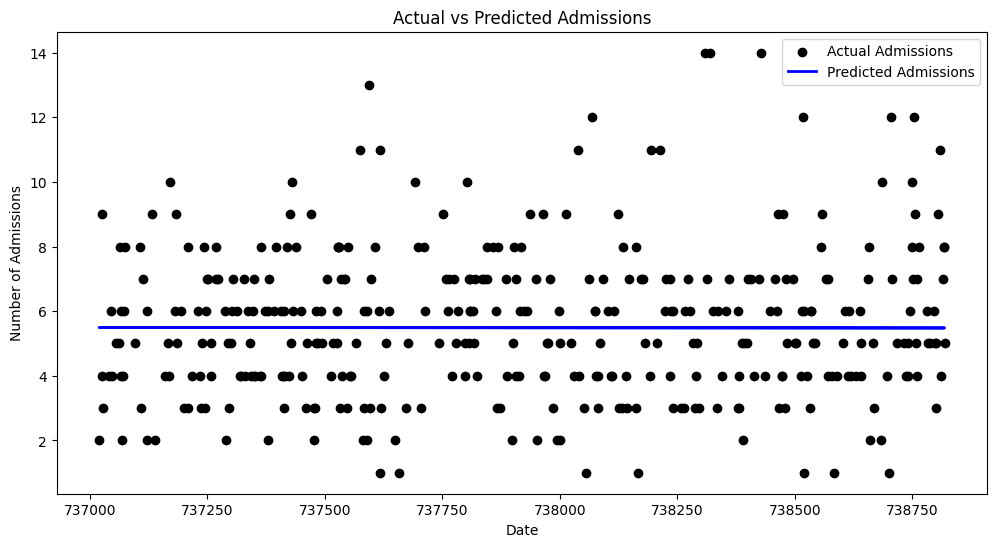

In [156]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='black', label='Actual Admissions')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted Admissions')
plt.title('Actual vs Predicted Admissions')
plt.xlabel('Date')
plt.ylabel('Number of Admissions')
plt.legend()
plt.show()

Observations:
The model captures the general trend of admissions, but there are deviations where the model does not accurately predict spikes or drops in admissions. This is typical of simpler models like linear regression, which may not capture complex patterns or seasonal trends effectively.

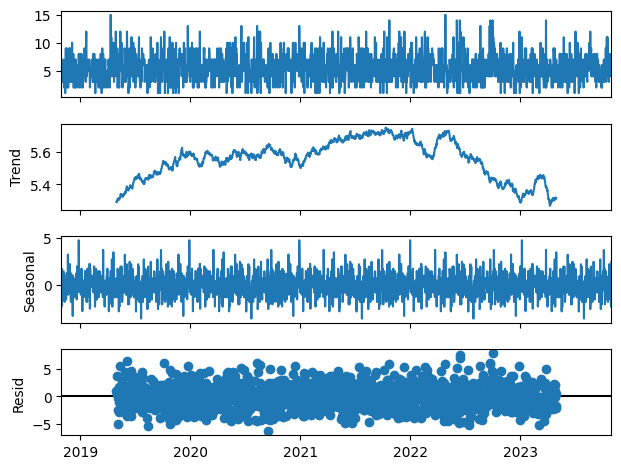

In [157]:
# Seasonal Analysis

from statsmodels.tsa.seasonal import seasonal_decompose

# Convert daily admissions to a time series
admissions_series = pd.Series(data=daily_admissions.values, index=pd.to_datetime(daily_admissions.index))

# Seasonal decomposition
result = seasonal_decompose(admissions_series, model='additive', period=365)  # Assuming yearly seasonality
result.plot()
plt.show()


The seasonal decomposition of daily patient admissions reveals the following components:

Trend: Shows any long-term increase or decrease in the data. Here, it appears relatively stable with some fluctuations.
Seasonal: Highlights the regular pattern within a year, which might correspond to seasonal variations in health issues or hospital visitations.
Residual: Represents the irregularities not captured by the trend or seasonal components, including random variations and anomalies.

In [158]:
# Cross-Validation:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

# Time series cross-validation setup
tscv = TimeSeriesSplit(n_splits=5)
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=tscv, scoring='neg_mean_squared_error')

# Output the cross-validation results
print("Cross-Validation MSE Scores:", -cv_scores)
print("Mean MSE:", -np.mean(cv_scores))


Cross-Validation MSE Scores: [5.92220087 6.0744464  6.37047694 6.53810032 5.18608203]
Mean MSE: 6.01826131052092


Cross-Validation Results:
The cross-validation with time series splitting provided the following Mean Squared Error (MSE) scores for each fold:

Fold 1 MSE: 5.92
Fold 2 MSE: 6.07
Fold 3 MSE: 6.37
Fold 4 MSE: 6.54
Fold 5 MSE: 5.19
Average MSE across all folds: 6.02
                                                                                                      
Observations:
The MSE scores are relatively consistent across different time splits, indicating that the model has a stable performance across the time series. This consistency is a good sign, suggesting the model's reliability for future forecasting.
The average MSE is slightly higher than the initial MSE (5.53) we calculated before, which might be due to differences in data distribution across time or the specific splits used in cross-validation.

# Network Construction

Node Definition:
Each healthcare facility in your dataset will be defined as a node.
Nodes will carry attributes like average patient age and common treatments based on the admissions data.
Edge Definition:
Edges will represent patient transfers between facilities. If direct transfer data isn't available, we can infer transfers from consecutive admissions.
Edges will be weighted by the volume of transfers or potentially by the severity of conditions treated during these transfers.
Graph Representation:
Construct the graph using NetworkX, a Python library ideal for complex network analysis. This will accurately represent the connections and flows based on your dataset.

In [159]:
# Step 1: Graph Construction

G = nx.DiGraph()

# Adding nodes
hospitals = network_data['Hospital_encoded'].unique()
G.add_nodes_from(hospitals)

# Node attributes for average age and common conditions
for hospital in hospitals:
    hospital_data = network_data[network_data['Hospital_encoded'] == hospital]
    G.nodes[hospital]['avg_age'] = hospital_data['Age'].mean()
    G.nodes[hospital]['common_conditions'] = hospital_data['Medical_Condition_encoded'].mode()[0]

# Adding edges based on consecutive patient admissions
for i in range(len(network_data) - 1):
    if data['Discharge Date'].iloc[i] <= network_data['Date of Admission'].iloc[i + 1]:
        G.add_edge(network_data['Hospital_encoded'].iloc[i], network_data['Hospital_encoded'].iloc[i + 1], weight=1)

# Checking the number of nodes and edges to ensure the graph is constructed properly
(G.number_of_nodes(), G.number_of_edges())


(8639, 4883)

# Network Analysis


1. Visualize the Network
Creating a visualization of the network can help us understand the overall structure and identify prominent nodes visually. For a large graph like yours, we'll create a simplified visualization focusing on a subset of highly connected nodes to keep it interpretable.

2. Calculate Centrality Metrics
We will calculate several centrality metrics to identify the most influential hospitals in the network. These metrics include:

Degree Centrality: Measures the number of direct connections a node has.
Betweenness Centrality: Measures the number of times a node acts as a bridge along the shortest path between two other nodes.
3. Community Detection
We will apply community detection algorithms to find clusters of hospitals that frequently interact, which might indicate regional groupings or specialized service clusters.

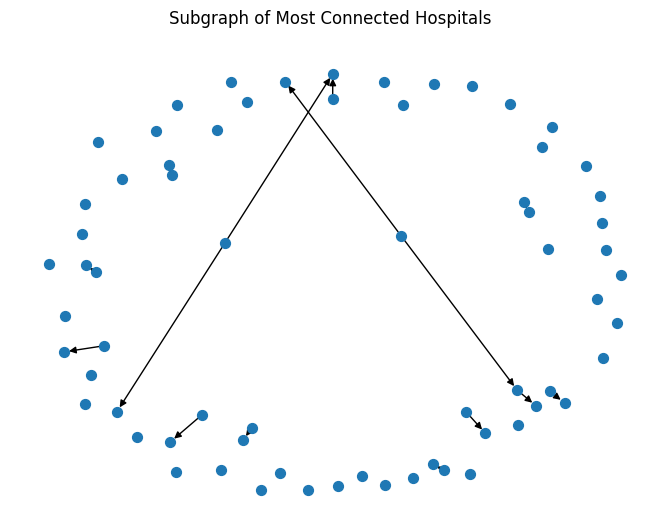

In [160]:
import matplotlib.pyplot as plt
import networkx as nx

# Since the full graph is large, let's visualize a subgraph of the most connected nodes
subgraph_nodes = [n for n, d in G.degree() if d > 5]  # Filtering nodes with more than 5 connections
subG = G.subgraph(subgraph_nodes)

pos = nx.spring_layout(subG)  # Positions for all nodes
nx.draw(subG, pos, node_size=50, with_labels=False)
plt.title('Subgraph of Most Connected Hospitals')
plt.show()


In [161]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)

# Sorting nodes by degree centrality
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Display top 5 nodes by each centrality measure
print("Top 5 Hospitals by Degree Centrality:", sorted_degree[:5])
print("Top 5 Hospitals by Betweenness Centrality:", sorted_betweenness[:5])


Top 5 Hospitals by Degree Centrality: [(7115, 0.0017365130817318824), (7114, 0.0017365130817318824), (3769, 0.0015049780041676312), (7110, 0.0013892104653855058), (7111, 0.0013892104653855058)]
Top 5 Hospitals by Betweenness Centrality: [(7115, 1.8590896872850302e-05), (3317, 1.3068582877454249e-05), (7561, 8.323682017332399e-06), (2694, 8.149434245633009e-06), (4676, 7.506057857819877e-06)]


In [162]:
import networkx as nx
from networkx.algorithms import community

# Using the Girvan-Newman method
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted_communities = sorted(map(sorted, next_level_communities))

# Display the detected communities
print("Detected communities:")
for i, community in enumerate(sorted_communities, 1):
    print(f"Community {i}: {community}")

Detected communities:
Community 1: [0, 305, 563, 3398, 4880, 5280, 8594]
Community 2: [1, 1821, 4630, 6821]
Community 3: [2, 326, 1958]
Community 4: [3, 5374]
Community 5: [4, 6620]
Community 6: [5, 427]
Community 7: [6, 7813]
Community 8: [7, 4478, 6350]
Community 9: [8]
Community 10: [9, 2552]
Community 11: [10, 6435, 6598]
Community 12: [11, 802]
Community 13: [12, 21, 54, 66, 73, 99, 186, 187, 247, 535, 596, 655, 662, 665, 689, 707, 714, 718, 836, 866, 973, 997, 1085, 1086, 1289, 1295, 1494, 1530, 1627, 1659, 1670, 1684, 1736, 1840, 1850, 1867, 1961, 1992, 2004, 2013, 2038, 2060, 2100, 2161, 2174, 2239, 2256, 2261, 2299, 2312, 2483, 2486, 2641, 2665, 2669, 2679, 2689, 2694, 2730, 2857, 2954, 2978, 2989, 3046, 3052, 3053, 3093, 3114, 3177, 3184, 3207, 3317, 3320, 3362, 3478, 3498, 3588, 3643, 3704, 3776, 3953, 3962, 3988, 4036, 4109, 4146, 4160, 4170, 4228, 4240, 4383, 4421, 4468, 4547, 4552, 4580, 4607, 4664, 4676, 4712, 4769, 4997, 5006, 5007, 5215, 5247, 5289, 5382, 5434, 5485, 5

In [163]:
# Access the first 10 communities
communities = sorted_communities

# Find communities with the largest size
largest_size = max(len(community) for community in communities)
largest_communities = [
    community for community in communities if len(community) == largest_size
]

# Print the largest communities
print(f"Largest communities (size {largest_size}):")
for community in largest_communities:
    print(community)


Largest communities (size 164):
[12, 21, 54, 66, 73, 99, 186, 187, 247, 535, 596, 655, 662, 665, 689, 707, 714, 718, 836, 866, 973, 997, 1085, 1086, 1289, 1295, 1494, 1530, 1627, 1659, 1670, 1684, 1736, 1840, 1850, 1867, 1961, 1992, 2004, 2013, 2038, 2060, 2100, 2161, 2174, 2239, 2256, 2261, 2299, 2312, 2483, 2486, 2641, 2665, 2669, 2679, 2689, 2694, 2730, 2857, 2954, 2978, 2989, 3046, 3052, 3053, 3093, 3114, 3177, 3184, 3207, 3317, 3320, 3362, 3478, 3498, 3588, 3643, 3704, 3776, 3953, 3962, 3988, 4036, 4109, 4146, 4160, 4170, 4228, 4240, 4383, 4421, 4468, 4547, 4552, 4580, 4607, 4664, 4676, 4712, 4769, 4997, 5006, 5007, 5215, 5247, 5289, 5382, 5434, 5485, 5505, 5588, 5673, 5711, 5817, 5842, 6059, 6061, 6066, 6200, 6262, 6274, 6288, 6356, 6396, 6434, 6553, 6562, 6583, 6671, 6684, 6786, 6797, 6801, 6830, 6910, 6911, 6915, 6935, 6964, 7018, 7044, 7067, 7113, 7115, 7396, 7437, 7561, 7583, 7640, 7703, 7907, 7957, 7962, 8069, 8097, 8160, 8190, 8193, 8243, 8360, 8427, 8457, 8513]
